In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)

c:\Users\DeLL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']
df_Ind = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()
df_Ind = df_Ind.dropna(subset=['salary_year_avg'])
job_titles = ['Data Analyst','Data Engineer','Data Scientist']
job_list = [df_Ind[df_Ind['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

C:\Users\DeLL\AppData\Local\Temp\ipykernel_12224\1275371548.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles,vert=False)


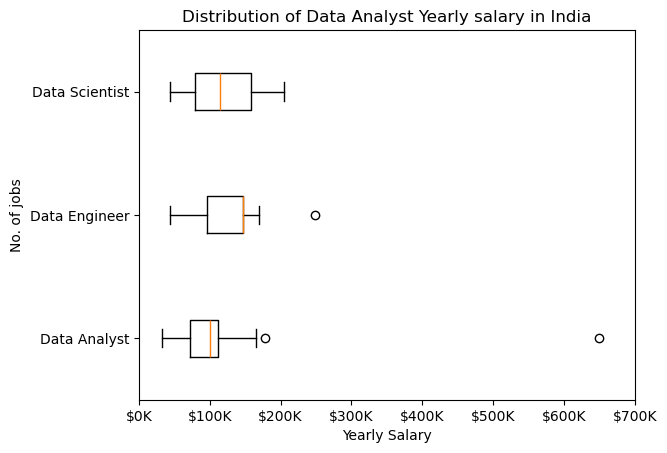

In [43]:
plt.boxplot(job_list, labels=job_titles,vert=False)
plt.title('Distribution of Data Analyst Yearly salary in India')
plt.xlabel('Yearly Salary')
plt.ylabel('No. of jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))
plt.xlim(0,700000)

plt.show()
